## CLIQUE

### CLustering In QUEst

Clique represents a grid- and density-based approach for subspace clustering in a high dimensional space.

A data object often has tens of attributes, many of which may be irrelevant. The values of attributes may vary considerably. These factors can make it difficult to locate clusters that span the entire data space. It may be more meaningful to instead search
for clusters within different subspaces of the data.<br> 

**Example:** <br> Health informatics application where patient records contain extensive attributes describing
personal information, numerous symptoms, conditions, and family history.

It can be difficult to find such a cluster within the entire data space because the age, gender, and job attributes of patients may vary dramatically within a wide range of values. Instead, by searching in subspaces, we may find a cluster of similar patients in a lower-dimensional space (e.g., patients who are similar to one other with respect to symptoms like high fever, cough but no runny
nose, and aged between 3 and 16).

### CLIQUE 
* partitions each dimension into nonoverlapping intervals, thereby partitioning the entire embedding space of the data objects into cells.
* uses a density threshold to identify dense cells and sparse ones. A cell is dense if the number of objects mapped to it exceeds the density threshold.

<div>
<img src="images\clique1.png" width="600">
</div>
Source: https://www.mdpi.com/1424-8220/19/18/3903/htm


* main strategy for identifying a candidate search space uses the monotonicity of dense cells with respect to dimensionality. In the context of clusters in subspaces, the monotonicity says the following. A $k$-dimensional cell $c$ $(k > 1)$ can have at least $l$ points only if every $(k − 1)$-dimensional projection of $c$, which is a cell in a $(k − 1)$-dimensional subspace, has at least $l$ points.




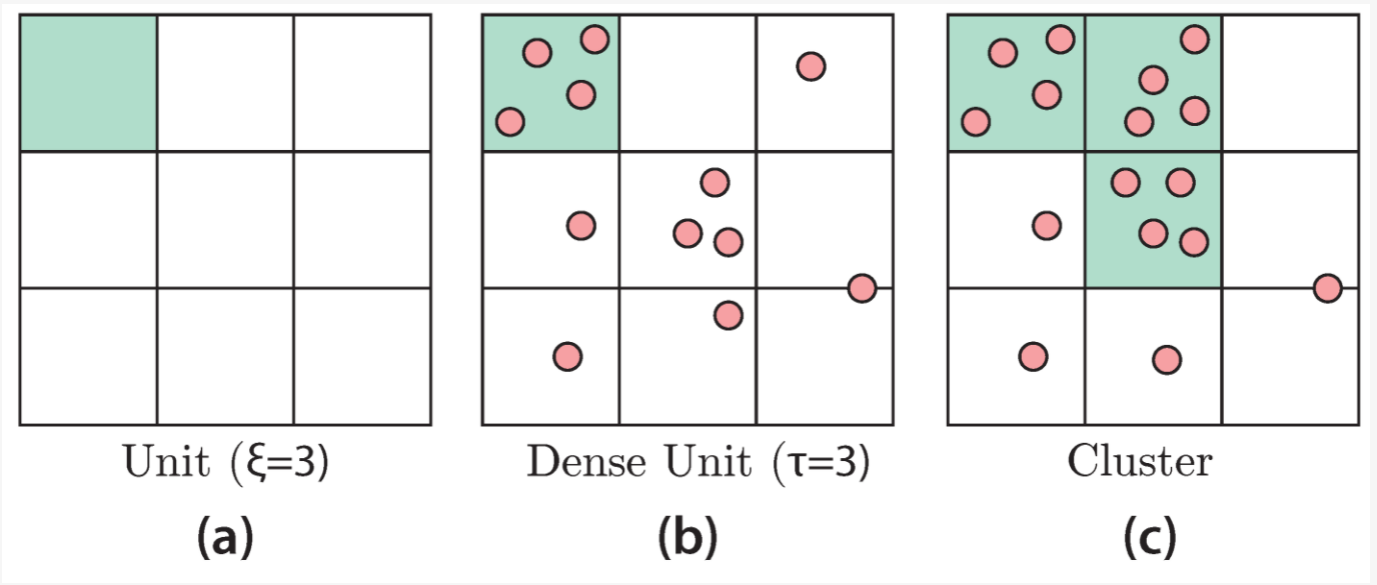


**Subspace Clustering**

<div>
<img src="images\clique2.png" width="600">
</div>
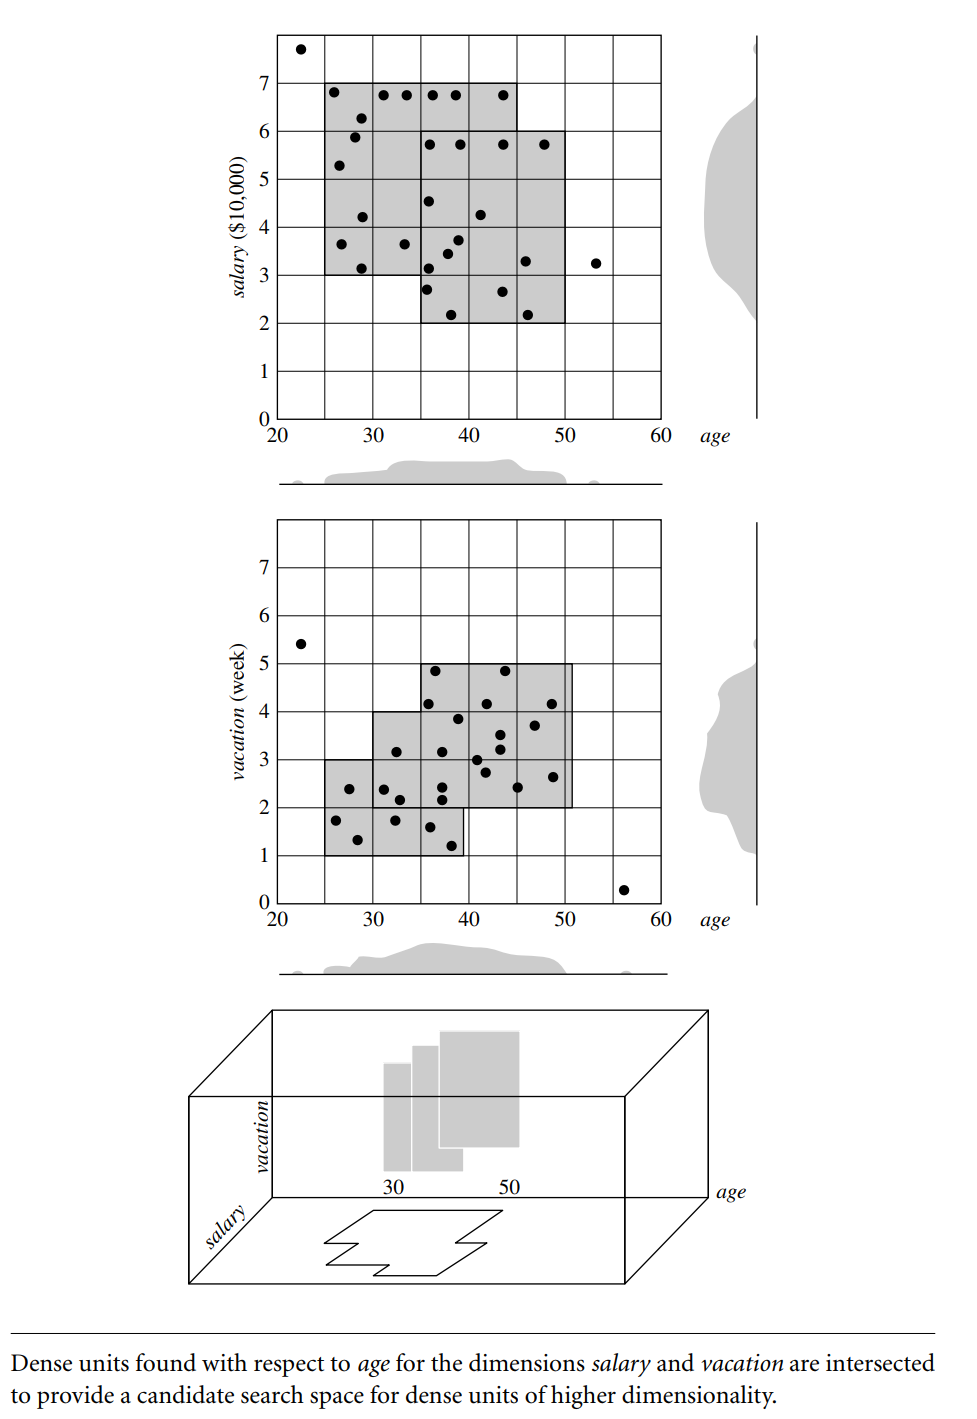

**CLIQUE performs clustering in two steps** 

**STEP 1:**

CLIQUE partitions the d-dimensional data space into nonoverlapping rectangular units, identifying the dense units among these. CLIQUE finds dense cells in all of the subspaces. CLIQUE partitions every dimension into intervals, and identifies intervals containing at least $l$ points, where $l$ is the density threshold. CLIQUE then iteratively joins two
k-dimensional dense cells, $c1$ and $c2$, in subspaces ($D_{i_1}$,...,$D_{i_k}$) and ($D_{j_1}$,...,$D_{j_k}$),
respectively, if $D_{i_1}$ = $D_{j_1}$,...,$D_{i_{k-1})}$ =$D_{j_{k-1}}$, and $c1$ and $c2$ share the same intervals in
those dimensions. The join operation generates a new $(k+1)$-dimensional candidate
cell $c$ in space ($D_{i_1}$,...,$D_{i_{k-1}}$,$D_{i_k}$ $D_{j_k}$) CLIQUE checks whether the number of points
in c passes the density threshold. The iteration terminates when no candidates can be
generated or no candidate cells are dense.

<div>
<img src="images\clique3.png" width="900">
</div>



**STEP 2:**

CLIQUE uses the dense cells in each subspace to assemble clusters,
which can be of arbitrary shape. The idea is to use the maximal regions to cover connected dense cells,
where a maximal region is a hyperrectangle where every cell falling into this region is
dense, and the region cannot be extended further in any dimension in the subspace.


Finding the best description of a cluster in general is NP-Hard. Thus, CLIQUE adopts
a simple greedy approach. It starts with an arbitrary dense cell, finds a maximal region
covering the cell, and then works on the remaining dense cells that have not yet been
covered. The greedy method terminates when all dense cells are covered.



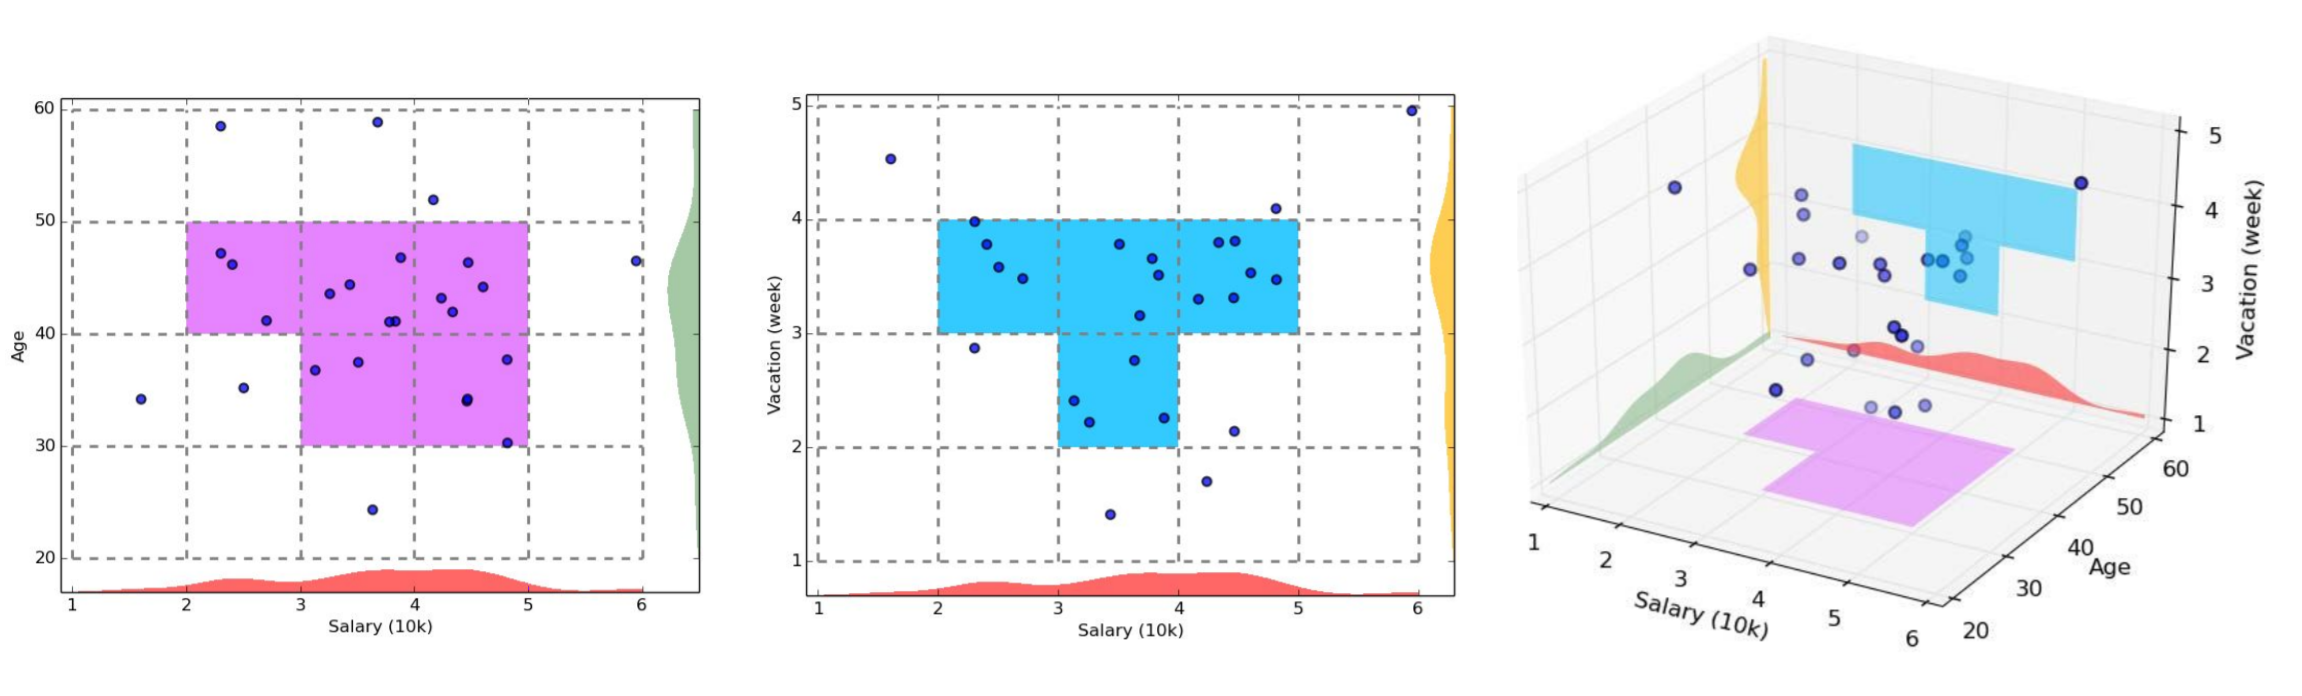

**Algorithm**: *CLIQUE*: a density-based grid-based high dimensional data clustering algorithm <br>
**Input**:
- $D$: a dataset containing $n$ objects
- $p$ : the range interval of the grid
- $\tau$: the neighborhood density threshold
**Method**: <br>
$\quad$ **begin** <br>
$\quad$$\quad$ Discretize each dimension of data set $D$ into $p$ ranges <br>
$\quad$$\quad$ Determine dense combinations of grid cells at minimum support τ
using any frequent pattern mining algorithm <br>
$\quad$$\quad$ Create graph in which dense grid combinations are
connected if they are adjacent <br>
$\quad$$\quad$ Determine connected components of graph <br>
$\quad$**return** (point set, subspace) pair for each connected component  <br>
**end**

**How effective is CLIQUE?**

* automatically finds subspaces of the highest dimensionality such that high-density clusters exist in those subspaces
* it is insensitive to the order of input objects and does not presume any canonical data distribution
* it scales linearly with the size of the input and has good scalability as the number of dimensions in the data is increased 

However, obtaining a meaningful clustering is dependent
on proper tuning of the grid size (which is a stable structure here) and the density
threshold. This can be difficult in practice because the grid size and density threshold
are used across all combinations of dimensions in the data set. Thus, the accuracy of the
clustering results may be degraded at the expense of the method’s simplicity. 

Moreover,
for a given dense region, all projections of the region onto lower-dimensionality subspaces will also be dense. This can result in a large overlap among the reported dense regions. Furthermore, it is difficult to find clusters of rather different densities within different dimensional subspaces.

Several extensions to this approach follow a similar philosophy. For example, we can
think of a grid as a set of fixed bins. Instead of using fixed bins for each of the dimensions,
we can use an adaptive, data-driven strategy to dynamically determine the bins for each
dimension based on data distribution statistics.

In [2]:
# Demo sample from: https://pyclustering.github.io/docs/0.9.0/html/d2/d4f/classpyclustering_1_1cluster_1_1clique_1_1clique.html

from pyclustering.cluster.clique import clique, clique_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES


In [2]:

# read two-dimensional input data 'Target'
data = read_sample(FCPS_SAMPLES.SAMPLE_TARGET)


# create CLIQUE algorithm for processing
intervals = 10  # defines amount of cells in grid in each dimension
threshold = 0   # lets consider each point as non-outlier
clique_instance = clique(data, intervals, threshold)



In [3]:

# start clustering process and obtain results
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))



Amount of clusters: 6


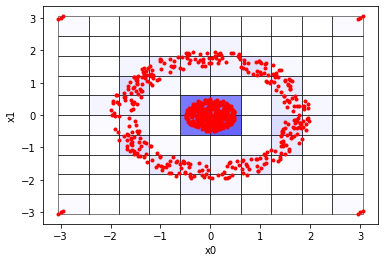

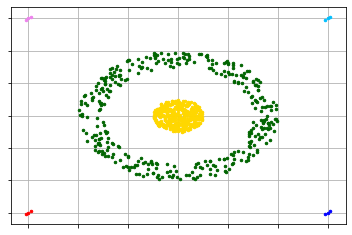

In [4]:

# visualize clustering results
clique_visualizer.show_grid(cells, data)    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(data, clusters, noise)  # show clustering results

In [18]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from pyclustering.cluster.clique import clique, clique_visualizer
from pyclustering.cluster import cluster_visualizer_multidim

# read two-dimensional input data 'Target'
X, labels_true = load_wine(return_X_y=True)


X = StandardScaler().fit_transform(X[:,:5])
data = X


# create CLIQUE algorithm for processing
intervals = 3  # defines amount of cells in grid in each dimension
threshold = 0   # lets consider each point as non-outlier
clique_instance = clique(data, intervals, threshold)

In [19]:

# start clustering process and obtain results
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))

Amount of clusters: 3


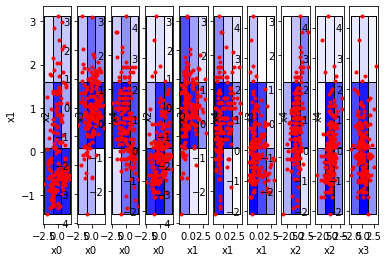

TypeError: __init__() takes 1 positional argument but 2 were given

In [27]:

# visualize clustering results
clique_visualizer.show_grid(cells, data)    # show grid that has been formed by the algorithm
